# Packages

In [1]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import arviz
import time
import os
from mpl_toolkits.mplot3d import Axes3D

# Paths and dataset

In [15]:
results_path = '../../LargeFilesResults/Model'  # where the outputs of this notebook will be saved

In [16]:
betas_cols = list(np.arange(start=3, stop=28, step=1))

In [17]:
posteriors = pd.read_csv(os.path.join(results_path, 'entirefit_shared_revised.csv'), usecols=betas_cols)
summary    = pd.read_csv(os.path.join(results_path, 'fit_summary_shared_revised.csv'))

In [18]:
parameters = summary[['LOG_STELLAR_MASS', 'Z']]

In [19]:
param_short = parameters.iloc[:900]

# Posteriors

In [20]:
whan_classes = ['Not classified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF']
palette      = ['#e41a1c', '#ff7f00', '#4daf4a', '#377eb8','#984ea3']*5
figsize      = (20, 20)
alpha        = 0.4

In [21]:
columns = list(posteriors.keys())

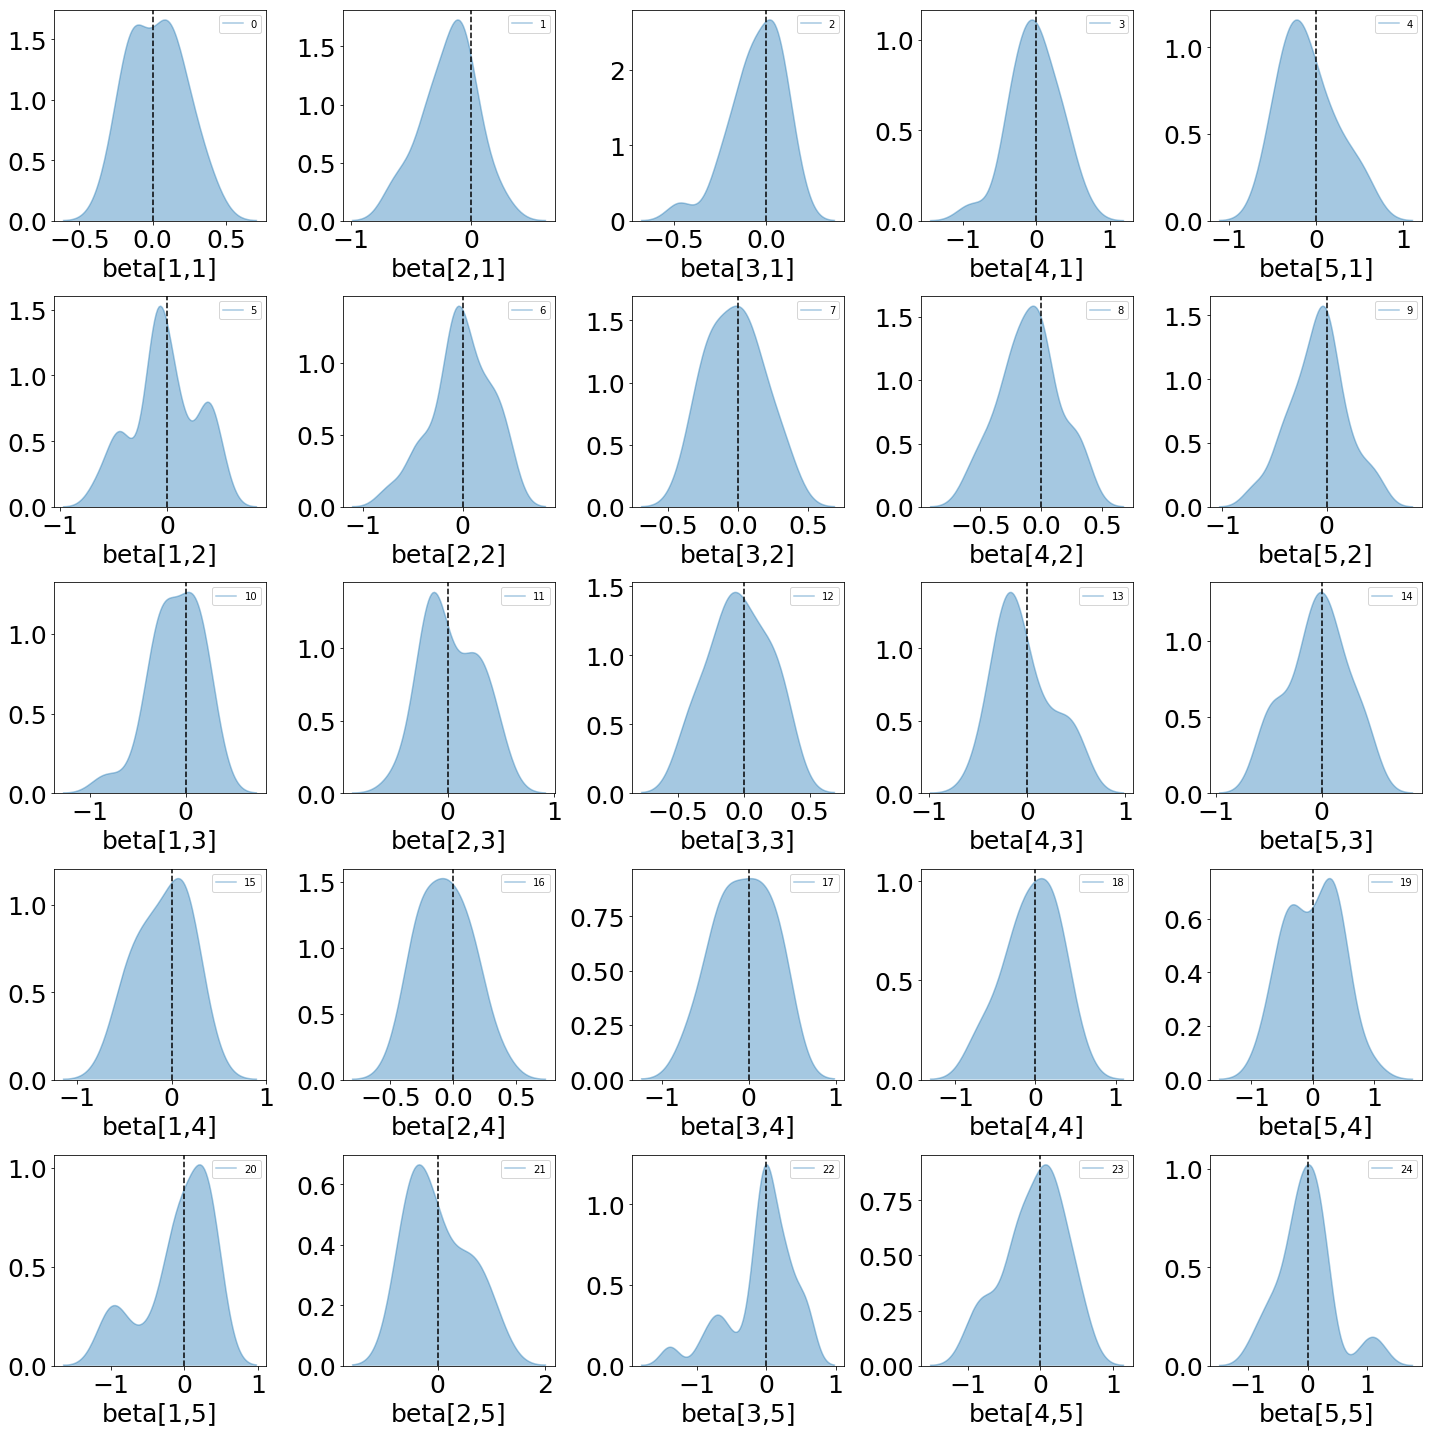

In [22]:
plt.subplots(figsize=figsize)
position = 1
for i in range(len(columns)):
    plot = plt.subplot(5, 5, position)
    sns.kdeplot(posteriors.iloc[i], shade=True, alpha=alpha)
    plt.xlabel(r"%s" % str(columns[i]), fontsize=25)
    plt.axvline(x=0, linestyle="--", color='black')
    plt.tick_params('both', labelsize='25')
#     plt.xlim([-1.5,1.5])
#     plt.ylim([0,3.5])
    position+=1
#     if (i==0):
#         plt.ylabel("$\,$ WHAN \n %s" % whan_classes[position], fontsize=25)
    plt.tight_layout()
plt.savefig(os.path.join(results_path, 'betas_revised.png'))
plt.show()

In [10]:
iterations = np.arange(0, 1500, step=1)
iterations

array([   0,    1,    2, ..., 1497, 1498, 1499])

KeyError: 0

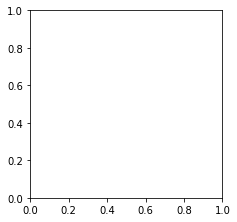

In [11]:
plt.subplots(figsize=figsize)
position = 1
for i in range(len(columns)):
    plot = plt.subplot(5, 5, position)
    for j in range(len(iterations)):   
        plt.plot(iterations[j], posteriors[i].values, '--')
    plt.xlabel(r"%s" % str(columns[i]), fontsize=25)
    plt.axvline(x=0, linestyle="--", color='black')
    plt.tick_params('both', labelsize='25')
#     plt.xlim([-1.5,1.5])
#     plt.ylim([0,3.5])
    position+=1
#     if (i==0):
#         plt.ylabel("$\,$ WHAN \n %s" % whan_classes[position], fontsize=25)
    plt.tight_layout()
# plt.savefig(os.path.join(results_path, 'betas_revised.png'))
plt.show()

# Simplifying the probabilities' dataframe

In [ ]:
entire_fit = pd.read_csv(os.path.join(results_path, 'entirefit_shared_revised.csv'))

In [ ]:
entire_fit.keys()

In [ ]:
header = np.array(entire_fit.keys())

In [ ]:
prob_keys = []
for i in header:
    if i[0:4]=='prob':
        prob_keys.append(i)
    else:
        continue

In [ ]:
probabilities = entire_fit[prob_keys]

In [ ]:
probabilities

In [ ]:
probabilities_transposed = probabilities.T

In [ ]:
print(probabilities_transposed.columns)

In [ ]:
iterations = probabilities_transposed.columns.size
new_header = []
for i in range(iterations):
    new_header.append('itr%i' % i)
print(len(new_header))

In [ ]:
probabilities_transposed.columns = new_header

In [ ]:
probabilities_transposed

In [ ]:
percentiles = [0.025, 0.25, 0.50, 0.75, 0.975]

In [ ]:
lines = probabilities_transposed.iloc[:, 0].size

for i in range(lines):   
    if i==0:
        stats_temp    = probabilities_transposed.iloc[i, :].describe(percentiles=percentiles)
        shrinked_temp = pd.DataFrame(stats_temp)
    else:
        stats_temp    = pd.DataFrame(probabilities_transposed.iloc[i, :].describe(percentiles=percentiles))
        shrinked_temp = shrinked_temp.join(stats_temp)
shrinked_df = shrinked_temp.T
shrinked_df

In [ ]:
print(shrinked_df.values.shape, parameters.shape)

In [ ]:
loc = shrinked_df.iloc[0, :].size
print(loc)

In [ ]:
shrinked_df.insert(loc=loc, value=parameters['LOG_STELLAR_MASS'].values, column='LOG_STELLAR_MASS')

In [ ]:
shrinked_df.insert(loc=(loc+1), value=parameters['Z'].values, column='Z')

In [ ]:
shrinked_df

In [ ]:
shrinked_df.to_csv(os.path.join(results_path, 'allprobabilities_summ_revised.csv'))

In [ ]:
step = 900
prob01 = shrinked_df.iloc[:step, :]
prob02 = shrinked_df.iloc[step:(step*2), :]
prob03 = shrinked_df.iloc[(step*2):(step*3), :]
prob04 = shrinked_df.iloc[(step*3):(step*4), :]
prob05 = shrinked_df.iloc[(step*4):(step*5), :]

### Testing first class

In [ ]:
zu = np.unique(prob01['LOG_STELLAR_MASS'].values)

In [ ]:
subset = prob01[prob01['LOG_STELLAR_MASS'].values==zu[6]]

In [ ]:
plt.plot(subset['Z'], subset['50%'], '--')
plt.plot(subset['Z'], subset['25%'], '--')
plt.plot(subset['Z'], subset['75%'], '--')
plt.ylim([0,0.5])
plt.show()

In [ ]:
np.unique(prob01['Z'].values)

In [ ]:
subset = prob01[prob01['Z']<0.07]

In [ ]:
subset

In [ ]:
plt.plot(subset['LOG_STELLAR_MASS'], subset['mean'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['25%'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['75%'], '--')
plt.show()